# Introduction to cheminformatics

Andrea Volkamer

#### Basic handling of molecules

* Reading & writing of molecules
* Molecular descriptors & fingerprints
* Molceular similarity

#### Using RDKit: open source cheminformatics software

More information can be found here:

* http://www.rdkit.org/docs/index.html
* http://www.rdkit.org/docs/api/index.html

In [1]:
# The majority of the basic molecular functionality is found in module rdkit.Chem library
from rdkit import Chem
from rdkit.Chem import AllChem

## Representation of molecules

### SMILES (Simplified Molecular Input Line Entry Specification)

* Atoms are represented by atomic symbols: C, N, O, F, S, Cl, Br, I
* Double bonds are `=`, triple bonds are `#`
* Branching is indicated by parenthesis
* Ring closures are indicated by pairs of matching digits

More information can be found here: http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

In [2]:
# Individual molecules can be constructed using a variety of approaches
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib

mol1 = Chem.MolFromSmiles('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1')
mol2 = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')

#### Drawing molecules

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

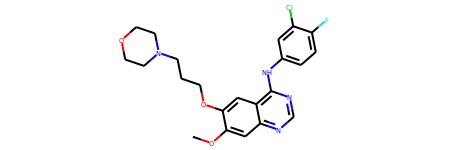

In [4]:
# Single molecule
mol1

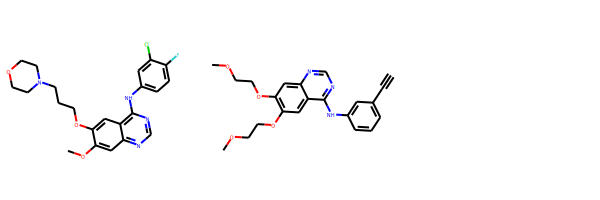

In [5]:
# List of molecules
Draw.MolsToGridImage([mol1,mol2], useSVG=True)

#### Molecule representation

In [6]:
# Molecule representation
print(Chem.MolToMolBlock(mol1))


     RDKit          2D

 31 34  0  0  0  0  0  0  0  0999 V2000
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    3.8971    0

### Generating 3D coordinates

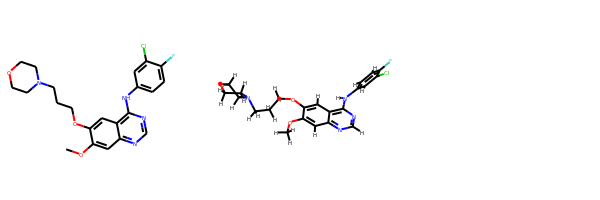

In [7]:
m_3D = Chem.AddHs(mol1)
AllChem.EmbedMolecule(m_3D)
AllChem.UFFOptimizeMolecule(m_3D) # Improves the quality of the conformation
Draw.MolsToGridImage([mol1,m_3D])

In [8]:
print(Chem.MolToMolBlock(m_3D))


     RDKit          3D

 55 58  0  0  0  0  0  0  0  0999 V2000
   -1.1077   -2.9025   -2.5605 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8828   -1.9283   -1.5439 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3720   -1.5960   -1.0059 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5330   -2.2974   -1.3948 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7814   -1.9744   -0.8587 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8853   -2.6510   -1.2679 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.1095   -2.3529   -0.7726 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2479   -1.3705    0.1527 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.1815   -0.6555    0.6006 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3807    0.3455    1.6140 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.5238    1.2202    1.6603 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8557    1.8592    2.8681 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9286    2.7507    2.9237 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.6869    3.0141    1

### Writing molecules to *sdf* (structure data files)

In [9]:
w = Chem.SDWriter('./data/mytest_mol3D.sdf')
w.write(m_3D)
w.close()

### Descriptors

#### Molecular descriptors (global)

In [10]:
from rdkit.Chem import Descriptors

In [11]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol1))
print ('H-bond donors:', Descriptors.NumHDonors(mol1))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol1))
print ('Lolecular weight:', Descriptors.MolWt(mol1))
print ('LogP:', Descriptors.MolLogP(mol1))

Heavy atoms: 31
H-bond donors: 1
H-bond acceptors: 7
Lolecular weight: 446.9100000000004
LogP: 4.275600000000003


In [12]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol2))
print ('H-bond donors:', Descriptors.NumHDonors(mol2))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol2))
print ('Molecular weight:', Descriptors.MolWt(mol2))
print ('LogP:', Descriptors.MolLogP(mol2))

Heavy atoms: 29
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 393.4430000000002
LogP: 3.405100000000002


#### Better for similarity search: Molecular fingerprints

#### MACCS keys

* There is a SMARTS-based implementation of the 166 public MACCS keys (certain substructure/SMARTS keys which are expected to be found)
* The MACCS keys are a set of questions about a chemical structure
* Based on counting substructural features

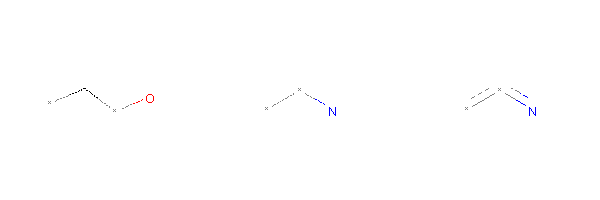

In [25]:
# Example MACCS keys

smarts = ['[#8]~*~[CH2]~*', 
          '*@*!@[#7]', 
          '[#7]!:*:*']
mols = []

for x in smarts:
    mols.append(Chem.MolFromSmarts(x))

Draw.MolsToImage(mols)

In [ ]:
from rdkit.Chem import MACCSkeys

In [ ]:
# Calculation of MACCS fingerprint

fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

In [ ]:
fp1.ToBitString()

In [ ]:
fp2.ToBitString()

### Molecular similarity

In [ ]:
from rdkit import DataStructs

In [ ]:
# Tanimoto
print ('Tanimoto:', DataStructs.TanimotoSimilarity(fp1,fp2))